In [2]:
%matplotlib inline 
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime

In [3]:
#file = "4_day_grid_15_min.csv"
file = "cnn_2019_sample.csv"
data = []
with open(file) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=" ")
    for row in readCSV:
        data.append(float(row[0]))

In [4]:
data = np.asarray(data)
#data = data.reshape(247,20,20)
data = data.reshape(467,20,20)
print(data.shape)

(467, 20, 20)


In [12]:
# one hour: 4
# one day: 4*24=96
day1 = data[3:99]
day2 = data[99:195]
day3 = data[195:291]
day4 = data[291:387]
day5 = data[387:]

print(day1.shape)
print(day2.shape)
print(day3.shape)
print(day4.shape)
print(day5.shape)

(96, 20, 20)
(96, 20, 20)
(96, 20, 20)
(96, 20, 20)
(80, 20, 20)


In [ ]:
0,4,8,12,16

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from matplotlib import interactive

(20, 20)
(20, 20)


'\nax = fig.add_subplot(1,1,1, projection=\'3d\')\nscat = ax.scatter(X, Y, dg,c=color, cmap="viridis_r")\nax.set_xlabel(\'lat\')\nax.set_ylabel(\'long\')\nax.set_zlabel(\'PM2.5\')\nax.set_zlim(0, 3)\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nax.yaxis.set_major_locator(MaxNLocator(integer=True))\nplt.colorbar(scat)\n'

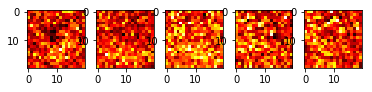

In [7]:
fig = plt.figure()
x = y = np.arange(0, 20, 1)
X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)

for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow(day4[i], cmap='hot', interpolation='nearest')

'''
ax = fig.add_subplot(1,1,1, projection='3d')
scat = ax.scatter(X, Y, dg,c=color, cmap="viridis_r")
ax.set_xlabel('lat')
ax.set_ylabel('long')
ax.set_zlabel('PM2.5')
ax.set_zlim(0, 3)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.colorbar(scat)
'''

In [17]:
year = 2019
month = 7
day = 26 
hour = 0
minute = 0
index = 0
for grid in day4:
    path = "cnn/day4/gp" + str(index) + ".txt"
    t = datetime.datetime(year, month, day, hour, minute)
    minute += 15
    if(minute == 60):
        minute = 0
        hour += 1
    np.savetxt(path, grid, delimiter=' ', header=str(t), comments='')
    index += 1